In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drive/MyDrive/S02.csv")

print(df.head())
print(df.info())
print(df.describe())

# пропуски
print(df.isna().mean())
# дубликаты
print(df.duplicated().sum())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [13]:
if (df['age'] > 100).any() or (df['age'] < 0).any():
  print('Странное значение age:')
  st_age = df[(df['age'] > 100) | (df['age'] < 0)]
  print(st_age[['user_id', 'age']])
  print()

if (df['purchases'] < 0).any():
  print('Странное значение purchases:')
  st_purchases = df[df['purchases'] < 0]
  print(st_purchases[['user_id', 'purchases']])
  print()

if (df['revenue'] < 0).any():
  print('Странное значение purchases:')
  st_revenue = df[df['purchases'] < 0]
  print(st_revenue[['user_id', 'revenue']])
  print()

if ((df['revenue'] == 0) & (df['purchases'] > 0)).any():
  print('Странное значение revenue (revenue=0 при purchases>0):')
  st_rev_purch = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
  print(st_rev_purch[['user_id', 'revenue', 'purchases']])

if ((df['purchases'] == 0) & (df['revenue'] > 0)).any():
  print('Странное значение (purchases=0 при revenue>0):')
  st_purch_rev = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
  print(st_purch_rev[['user_id', 'purchases', 'revenue']])

Странное значение age:
   user_id    age
5        6  120.0

Странное значение purchases:
   user_id  purchases
5        6         -1

Странное значение revenue (revenue=0 при purchases>0):
    user_id  revenue  purchases
10       11        0          4


In [14]:
print(df['country'].value_counts())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [15]:
group = df.groupby('country').agg({
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum'],
    'user_id': 'count'
})
print(group)

        purchases          revenue        user_id
             mean sum         mean    sum   count
country                                          
CN       4.500000   9  1054.000000   2108       2
DE       6.500000  39  1445.500000   8673       6
FR       4.250000  51   675.916667   8111      12
RU       4.769231  62   790.076923  10271      13
US       4.625000  37   557.375000   4459       8


Наибольшее количество пользователей из России - 13. Наименьшее количество пользователей из Китая - 2.
В России и Франции наибольшие показатели по сумме покупок. Меньше всего сумма покупок в Китае, сильно ниже чем во всех остальных странах. В Германии достаточно большая сумма покупок даже при условии небольшой разницы в количестве пользователей с Китаем и сильной разницей с Францией и Россиией.

In [16]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 100],
                         labels=['<18', '18-25', '26-35', '36-45', '46-55', '55+'])

age_groups = df.groupby('age_group').agg({
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum'],
    'user_id': 'count'
})

print(age_groups)

          purchases          revenue        user_id
               mean sum         mean    sum   count
age_group                                          
<18        6.000000  12  1296.000000   2592       2
18-25      5.000000  50   581.600000   5816      10
26-35      4.909091  54   946.818182  10415      11
36-45      4.833333  29  1106.000000   6636       6
46-55      4.000000  32   594.875000   4759       8
55+        7.000000   7   693.000000    693       1


/tmp/ipython-input-1211102865.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby('age_group').agg({


Наибольшее число людей соответствуют возрастной группе 25-25 лет. То есть молодые люди. Следующая по количеству группа людей 18-25 лет.
Меньше всего пользователей старше 55 лет и младше 18 лет.
Самая высокая стоимость покупой у пользователя из группы 55+ лет - 7 д.е. Высокие показатели по ценам покупок так же среди молодых людей младше 25 лет.


/tmp/ipython-input-1545393177.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df['purchases'], df['revenue'], cmap='tab10', alpha=1, s=100)


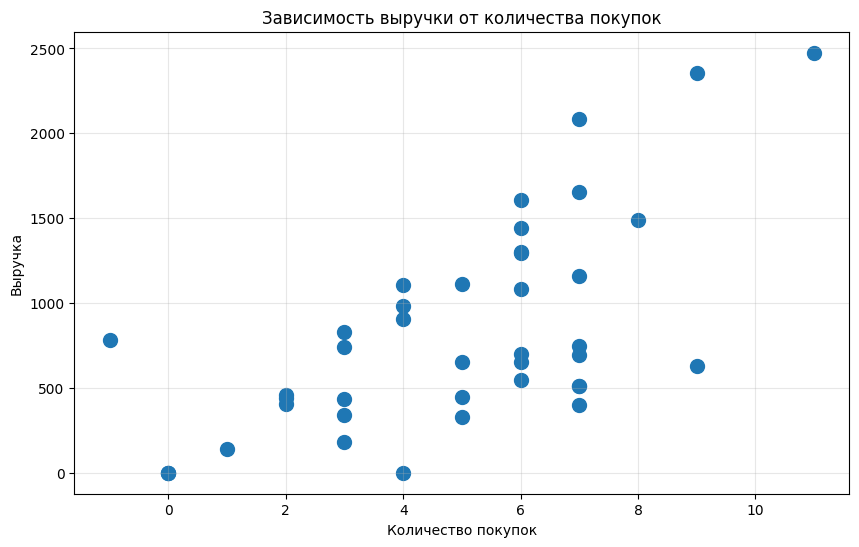

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from google.colab import files
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['purchases'], df['revenue'], cmap='tab10', alpha=1, s=100)
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, alpha=0.3)
plt.savefig('scatter.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('scatter.png')

<Figure size 1000x600 with 0 Axes>

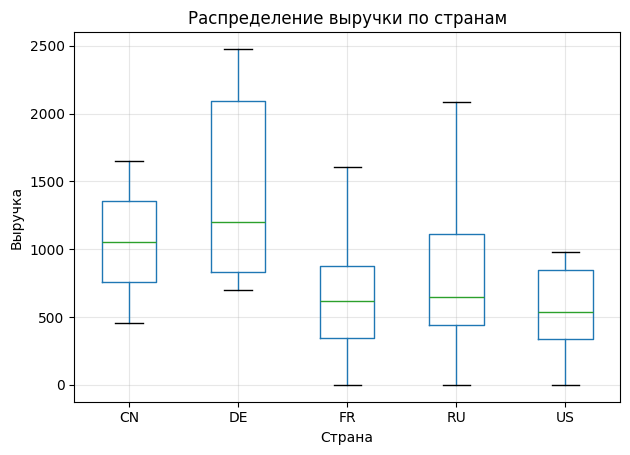

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import files
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country')
plt.title('Распределение выручки по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.suptitle('')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('boxplot.png')

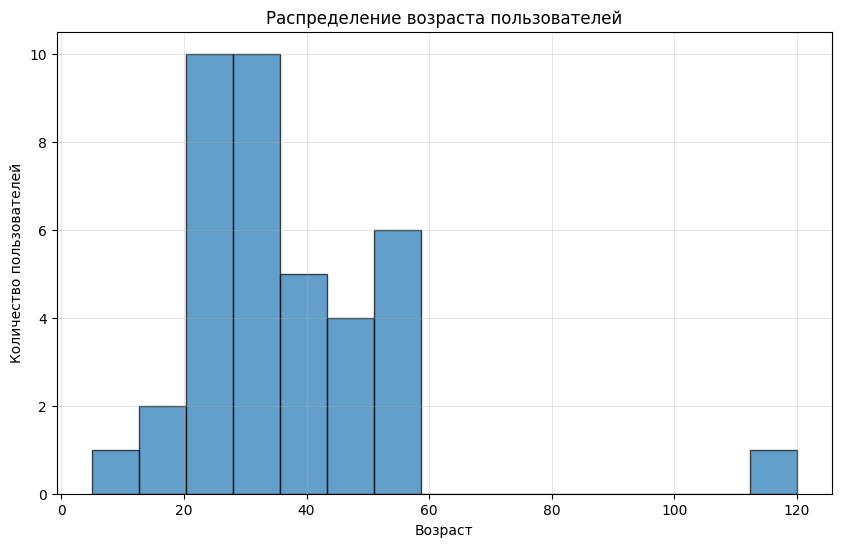

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from google.colab import files
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.savefig('hist_age.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('hist_age.png')